# Pegah givehchian- Project 4


In [2]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,BatchNormalization,Dropout,LeakyReLU,Conv2DTranspose,concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses, models


In [3]:
(x_total, y_total), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
class_arr = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
x_total.shape

(50000, 32, 32, 3)

In [6]:
y_total.shape

(50000, 1)

In [7]:
x_total[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Normalize

In [8]:
x_total = x_total.astype('float32')/255
x_test = x_test.astype('float32')/255

In [9]:
def plot_image(x):
    plt.figure(figsize = (10,2))
    plt.imshow(x)

In [10]:
x_1000 = []
y_1000 = []
for i in range(1000):
    j = random.randrange(50000)
    x_1000.append(x_total[j])
    y_1000.append(y_total[j])

In [11]:
x_train = []
x_1 = []
x_2 = []
y_train = []

for i in range(1000):
    n1 = random.randrange(1000)
    n2 = random.randrange(1000)
    x_train.append((x_1000[n1] + x_1000[n2])/2)
    x_1.append(x_1000[n1])
    x_2.append(x_1000[n2])
    y_train.append([y_1000[n1][0], y_1000[n2][0]])

In [12]:
x_train[0].shape

(32, 32, 3)

In [13]:
len(x_train)

1000

In [14]:
x_train = np.array(x_train)
x_1 = np.array(x_1)
x_2 = np.array(x_2)
y_train = np.array(y_train)

In [15]:
latent_dim = 64 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(16,(3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2), padding='same'),
            layers.Conv2D(8,(3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2), padding='same'),
            layers.Conv2D(8,(3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2), padding='same', name='encoder')
        ])
        self.decoder1 = tf.keras.Sequential([
            layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(16, (3, 3), activation='relu',padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
        ])
        self.decoder2 = tf.keras.Sequential([
            layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(16, (3, 3), activation='relu',padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded1 = self.decoder1(encoded)
        decoded2 = self.decoder2(encoded)
        return [decoded1, decoded2]

autoencoder = Autoencoder(latent_dim)

In [16]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=['accuracy'])


In [17]:
autoencoder.fit(x_train, [x_1, x_2],
                epochs=100)

Epoch 1/100
32/32 [==============================] - 7s 99ms/step - loss: 0.1279 - output_1_loss: 0.0639 - output_2_loss: 0.0641 - output_1_accuracy: 0.3556 - output_2_accuracy: 0.4009
Epoch 2/100
32/32 [==============================] - 3s 108ms/step - loss: 0.1189 - output_1_loss: 0.0593 - output_2_loss: 0.0596 - output_1_accuracy: 0.4179 - output_2_accuracy: 0.4892
Epoch 3/100
32/32 [==============================] - 4s 112ms/step - loss: 0.1048 - output_1_loss: 0.0526 - output_2_loss: 0.0522 - output_1_accuracy: 0.4008 - output_2_accuracy: 0.4259
Epoch 4/100
32/32 [==============================] - 3s 99ms/step - loss: 0.0987 - output_1_loss: 0.0499 - output_2_loss: 0.0488 - output_1_accuracy: 0.3885 - output_2_accuracy: 0.4384
Epoch 5/100
32/32 [==============================] - 3s 90ms/step - loss: 0.0960 - output_1_loss: 0.0486 - output_2_loss: 0.0474 - output_1_accuracy: 0.3739 - output_2_accuracy: 0.4534
Epoch 6/100
32/32 [==============================] - 3s 86ms/step - loss:

32/32 [==============================] - 3s 100ms/step - loss: 0.0810 - output_1_loss: 0.0409 - output_2_loss: 0.0401 - output_1_accuracy: 0.5113 - output_2_accuracy: 0.5149
Epoch 46/100
32/32 [==============================] - 3s 95ms/step - loss: 0.0813 - output_1_loss: 0.0410 - output_2_loss: 0.0403 - output_1_accuracy: 0.5172 - output_2_accuracy: 0.5146
Epoch 47/100
32/32 [==============================] - 3s 97ms/step - loss: 0.0812 - output_1_loss: 0.0409 - output_2_loss: 0.0403 - output_1_accuracy: 0.5047 - output_2_accuracy: 0.5165
Epoch 48/100
32/32 [==============================] - 3s 102ms/step - loss: 0.0810 - output_1_loss: 0.0408 - output_2_loss: 0.0403 - output_1_accuracy: 0.5193 - output_2_accuracy: 0.5140
Epoch 49/100
32/32 [==============================] - 3s 91ms/step - loss: 0.0820 - output_1_loss: 0.0415 - output_2_loss: 0.0405 - output_1_accuracy: 0.5160 - output_2_accuracy: 0.5134
Epoch 50/100
32/32 [==============================] - 3s 92ms/step - loss: 0.0823

In [18]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 4, 4, 8)           2192      
                                                                 
 sequential_1 (Sequential)   (None, 32, 32, 3)         2771      
                                                                 
 sequential_2 (Sequential)   (None, 32, 32, 3)         2771      
                                                                 
Total params: 7,734
Trainable params: 7,734
Non-trainable params: 0
_________________________________________________________________


In [19]:
predicted = autoencoder.predict(x_train)

32/32 [==============================] - 1s 31ms/step


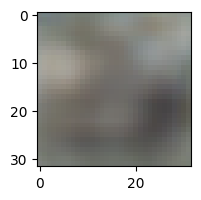

In [20]:
plot_image(predicted[0][12])

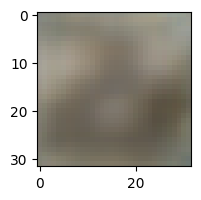

In [21]:
plot_image(predicted[1][12])

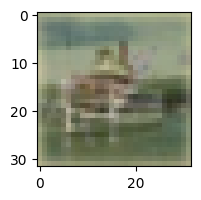

In [22]:
plot_image(x_train[12])

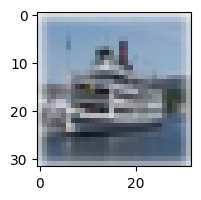

In [23]:
plot_image(x_1[12])

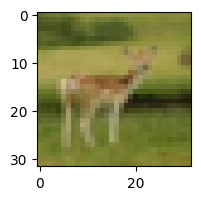

In [24]:
plot_image(x_2[12])

Here i have created an autoencoder, that is made of 2 decoders.
One is to guess the first picture from x_1, and the other has to guess the picture from x_2.
I spent a lot of time studying the different types of architechtures and came to the conclusion that unet, which is another type of autoencoder, would probably be a good choice to for this problem, because the same structure for converting an image to a vector is then used to map it to the image again, and this reduces the distortion, since the original structure is preserved.
But i didn't have time to implement that architecture since i found out about it too late.
Here we have an accuracy of about 52% and a loss of 0.07